In [7]:
from ect.tracking import FECTTransformer, FECTCorrTransformer
from ect.helpers import RandomImageGenerator, UnimodalGenerator, MultimodalGenerator, Mode
from ect import Config

import numpy as np
from matplotlib import pyplot as plt

In [13]:
m = [
    Mode(100, 45, 1), 
    Mode(35, 45, 1)
]
gen = MultimodalGenerator(m, logpolar=False, offset=0)

gen_log = MultimodalGenerator(m, offset=0)

# gen = RandomImageGenerator('/home/mateusz/Desktop/Magisterka/tracking/images/sequence_test', 10)

2024-06-12 01:08:56.686 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=0
2024-06-12 01:08:56.688 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


### FECT Transformer

In [14]:
tr = FECTTransformer(Config(offset_value_px=0, ect_offset_value_px=0), (314, 100))

2024-06-12 01:08:58.512 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=0
2024-06-12 01:08:58.514 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping


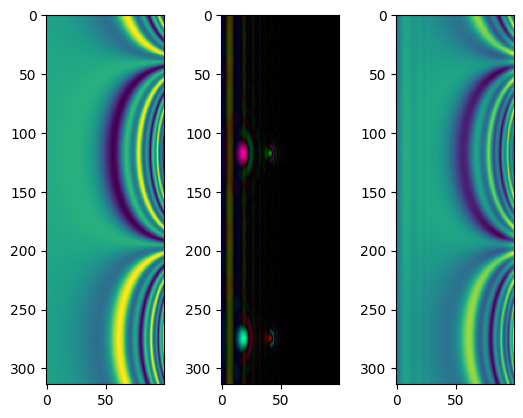

In [15]:
from ect import complex_to_hsv

img = gen.generate()
ect = tr.transform(img)
inv = tr.invert(ect, logpolar=False)

plt.subplot(1, 3, 1)
plt.imshow(gen_log.generate())

plt.subplot(1, 3, 2)
# plt.imshow(np.abs(ect))
plt.imshow(complex_to_hsv(ect) )

plt.subplot(1, 3, 3)
plt.imshow(np.real(inv))

### FECT Corr Transformer

In [11]:
tr = FECTCorrTransformer(Config(), (314, 100))

2024-06-12 01:08:45.594 | DEBUG    | ect.maps.logpolar_new:logpolar:50 - Running logpolar transform in offset mode offset=10
2024-06-12 01:08:45.596 | DEBUG    | ect.maps.logpolar_new:logpolar:63 - Applying bilinear pixel mapping
2024-06-12 01:08:45.651 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:78 - Running logpolar transform in offset mode
2024-06-12 01:08:45.653 | DEBUG    | ect.maps.ilogpolar_new:ilogpolar:94 - Applying bilinear pixel mapping


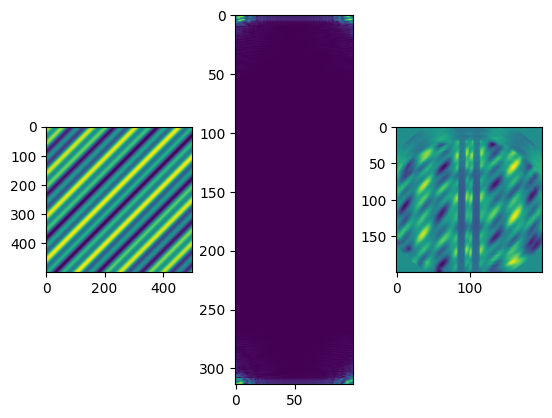

In [12]:
img = gen.generate()
ect = tr.transform(img)
inv = tr.invert(ect)

plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.imshow(np.abs(ect))

plt.subplot(1, 3, 3)
plt.imshow(np.real(inv))